# Iris Classification 

### Importing Libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

### Load and Explore the data 

In [12]:
#Load the dataset
data=pd.read_csv("Iris.csv")
#Explore the dataset 
print("Data Info")
print(df.info())
print("First 5 rows")
print(df.head())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
First 5 rows
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


## graph

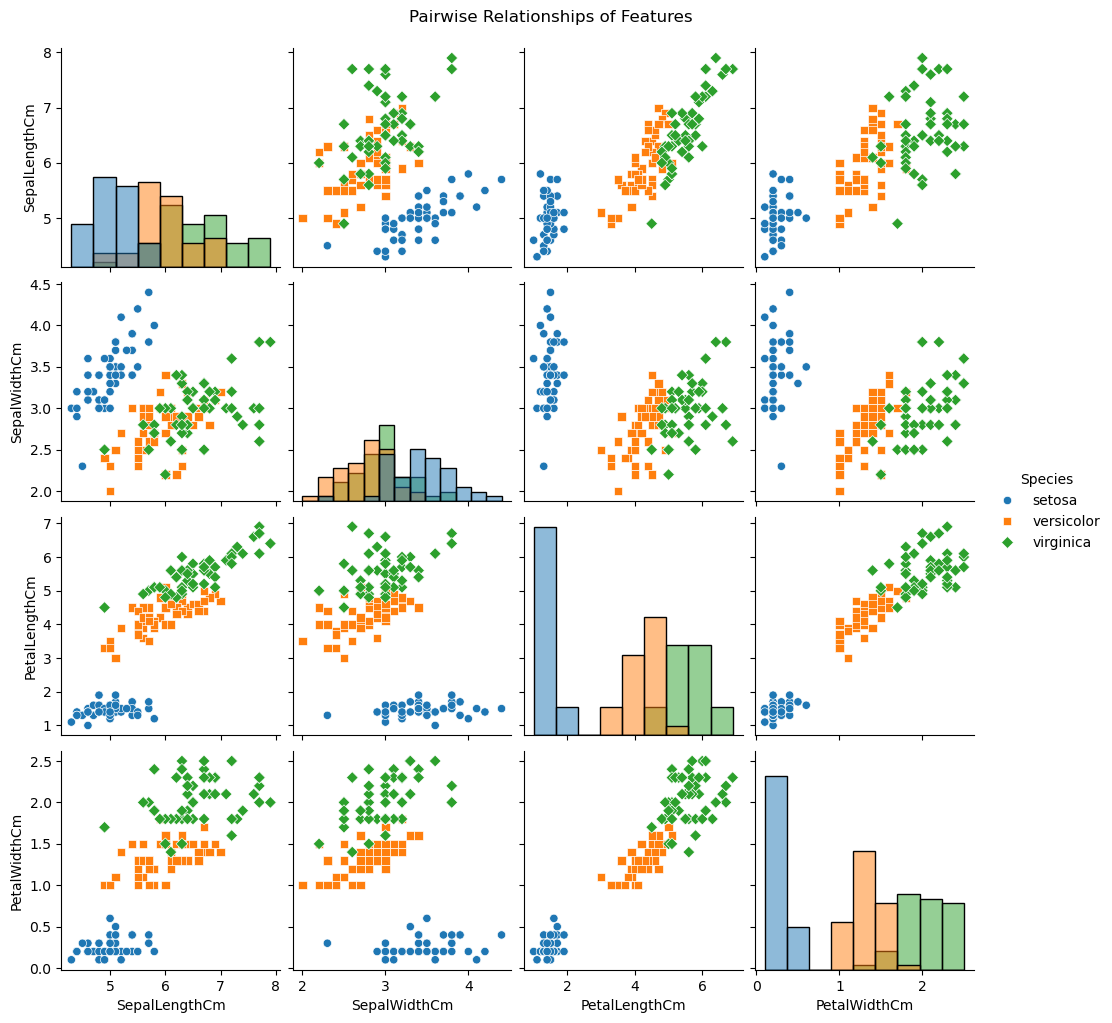

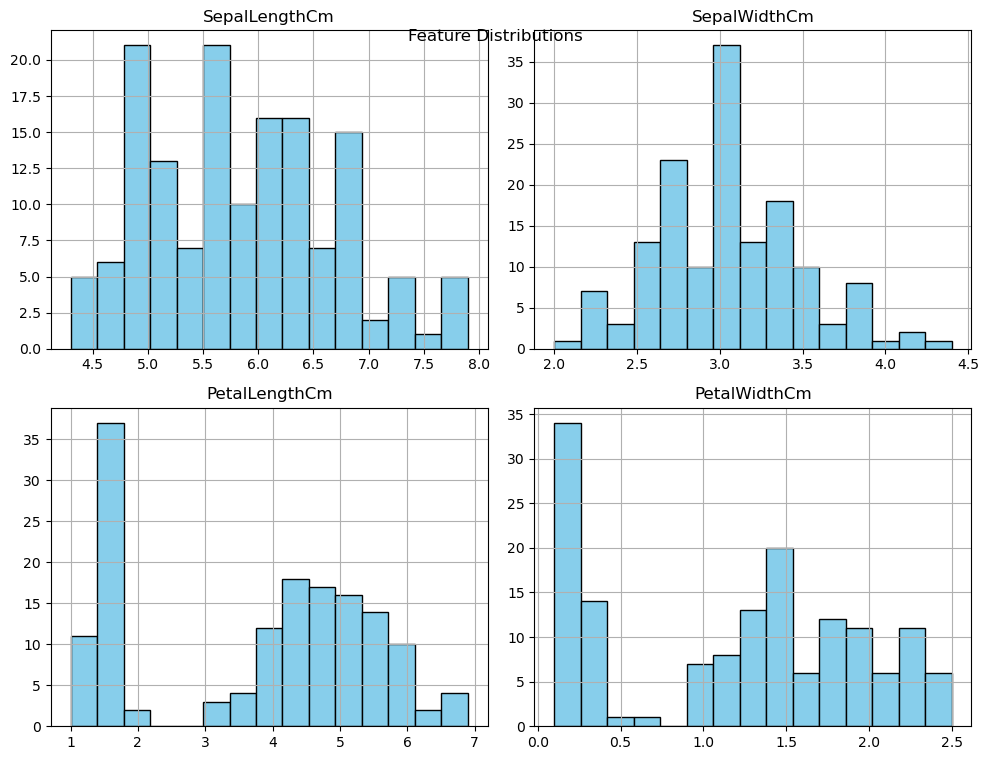

C:\Users\ashwini\AppData\Local\Temp\ipykernel_45804\65591942.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Species", y="SepalLengthCm", palette="viridis")


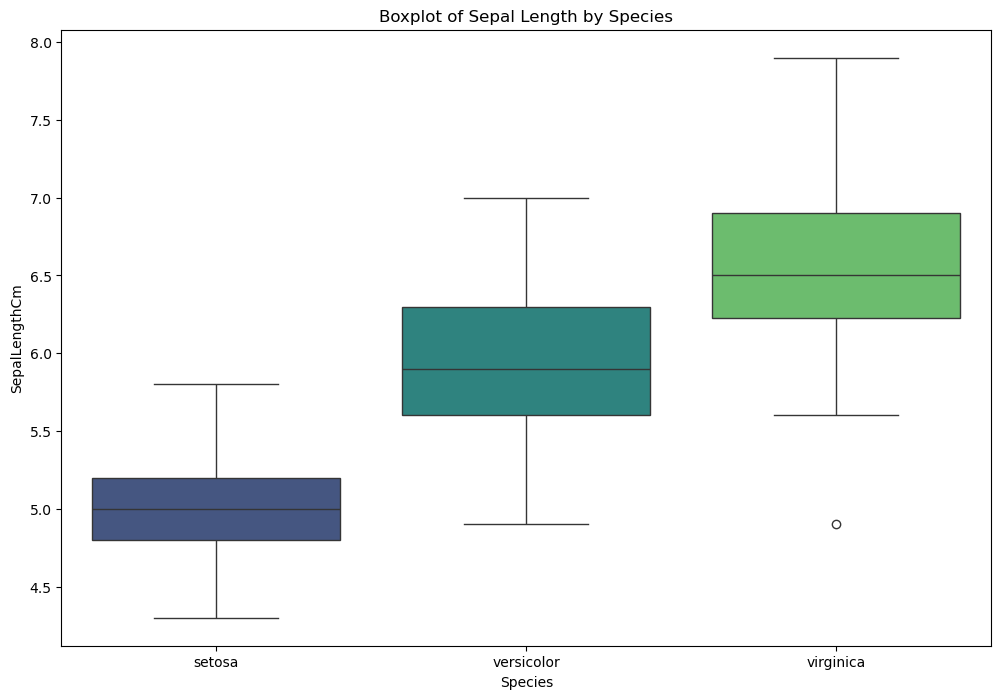

C:\Users\ashwini\AppData\Local\Temp\ipykernel_45804\65591942.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Species", y="PetalLengthCm", palette="coolwarm")


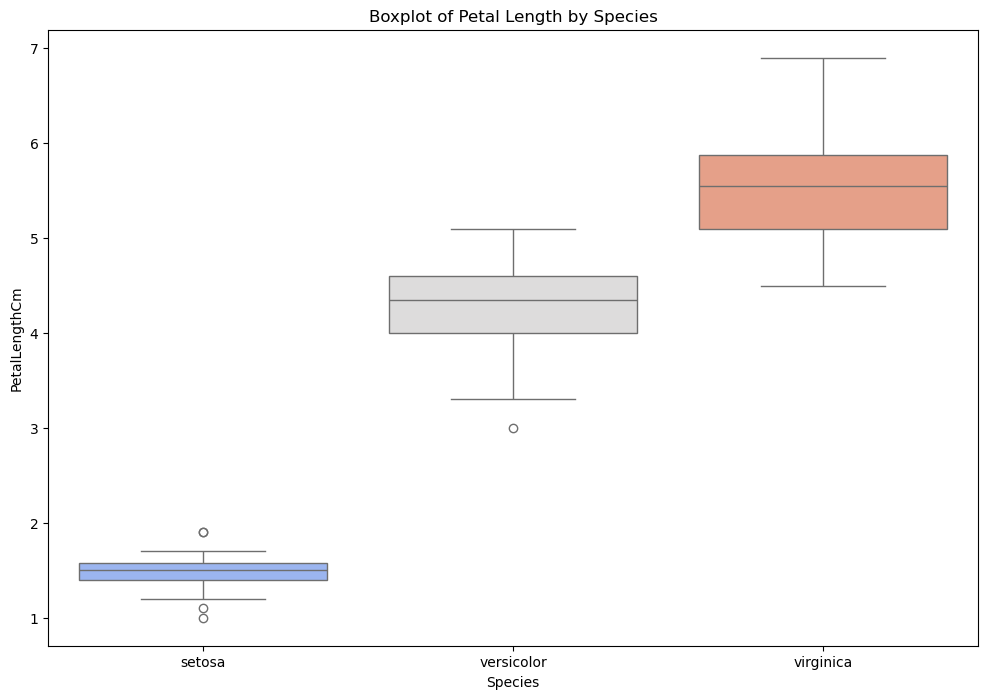

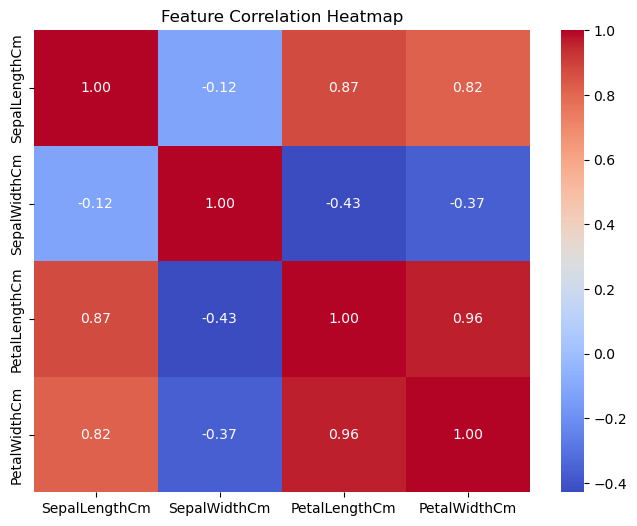

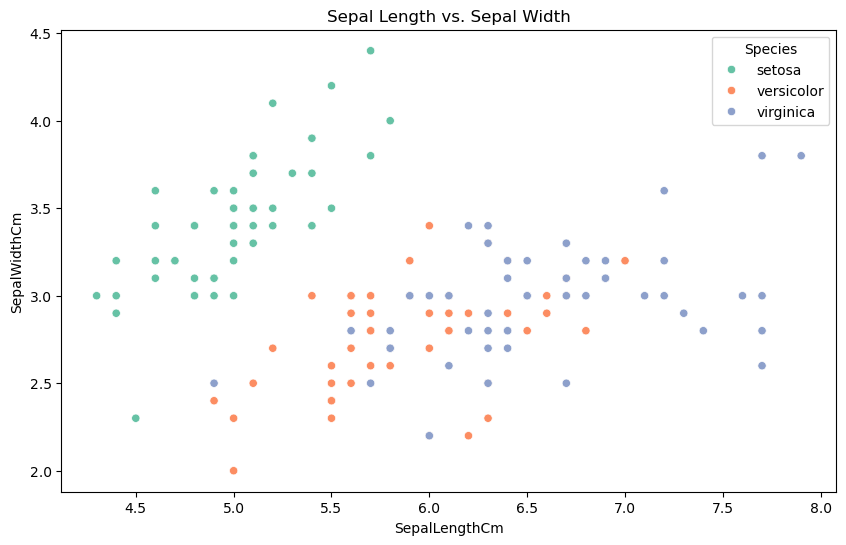

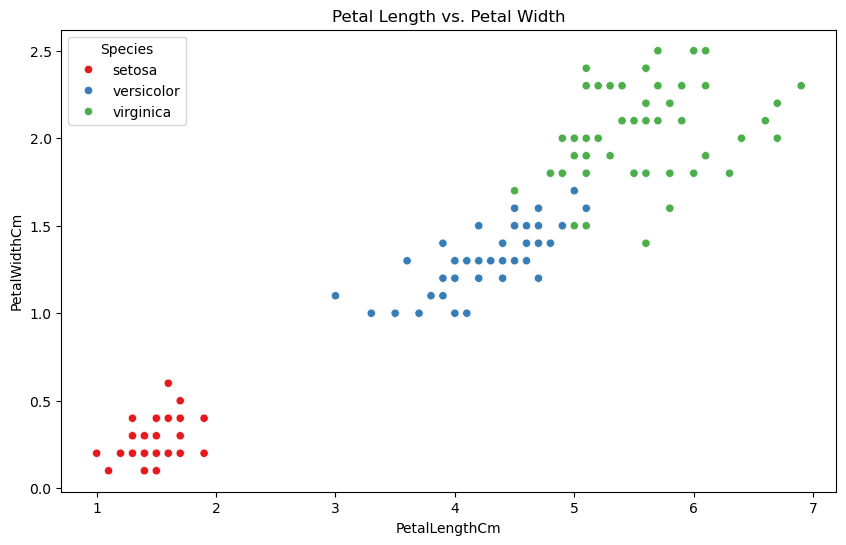

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace with your actual file path if using local CSV
data = sns.load_dataset('iris')

# Rename columns to match your existing naming style (optional)
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# Pairplot: Visualize pairwise relationships between features, colored by species
sns.pairplot(data, hue="Species", diag_kind="hist", markers=["o", "s", "D"])
plt.suptitle("Pairwise Relationships of Features", y=1.02)
plt.show()

# Histogram: Distribution of each feature for all classes combined
data.hist(figsize=(10, 8), bins=15, edgecolor='black', color='skyblue')
plt.suptitle("Feature Distributions", y=0.92)
plt.tight_layout()
plt.show()

# Boxplot: Inspect feature distributions and potential outliers for each species
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="Species", y="SepalLengthCm", palette="viridis")
plt.title("Boxplot of Sepal Length by Species")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="Species", y="PetalLengthCm", palette="coolwarm")
plt.title("Boxplot of Petal Length by Species")
plt.show()

# Correlation Heatmap: Understand relationships between numeric features
plt.figure(figsize=(8, 6))
correlation_matrix = data.drop(columns=["Species"]).corr()  # Drop non-numeric column
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatterplot: Sepal Length vs. Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="Set2")
plt.title("Sepal Length vs. Sepal Width")
plt.show()

# Scatterplot: Petal Length vs. Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm", hue="Species", palette="Set1")
plt.title("Petal Length vs. Petal Width")
plt.show()


### Separating feature and target 

In [25]:
X = df.drop(columns=['Species'])     # All columns except stroke 
y = df['Species']     # Represents the label for classification 

### Splitting the dataset

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13



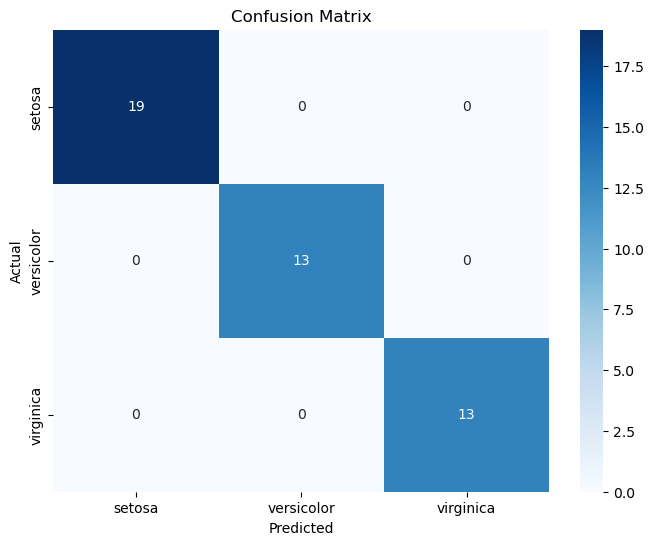

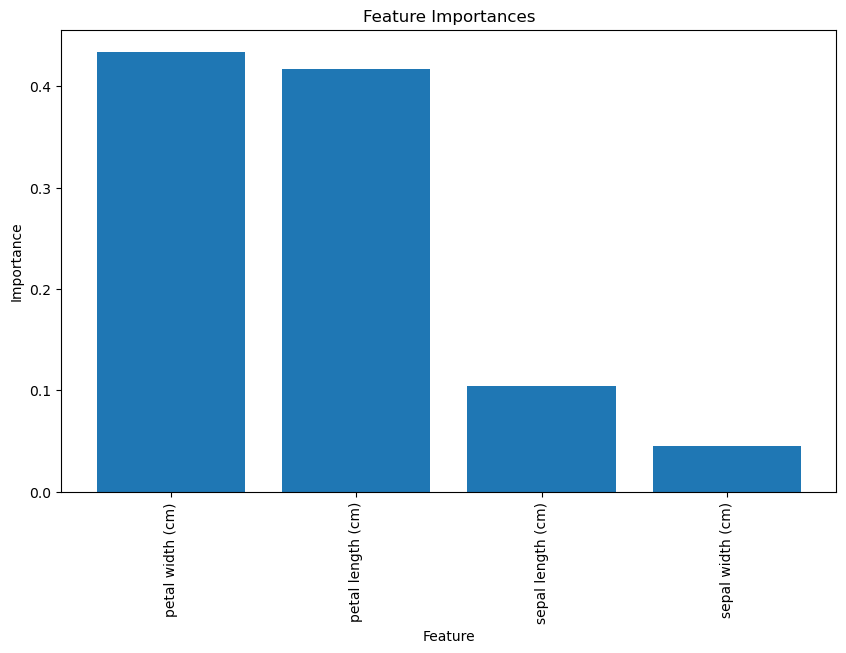

Cross-Validation Score: 100.00%


In [8]:
#  Data Preprocessing
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling (optional for Random Forest)
# Scaling is not strictly necessary, but let's demonstrate how it can be done.
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

#  Build Random Forest Model
rf = RandomForestClassifier(random_state=42)

#  Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

#  Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#  Feature Importance Visualization
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Cross-Validation Scores (Optional)
cross_val_scores = grid_search.best_estimator_.score(X_test, y_test)
print(f"Cross-Validation Score: {cross_val_scores * 100:.2f}%")
